In [1]:
from algorithms_sc.strings import boyer_moore, kmp
from algorithms_sc.strings.utils import CmpCountStr, generate_protein_text
from tqdm.auto import tqdm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Задание

Сравнить алгоритмы Бойера-Мура и Кнута-Морриса-Пратта на текстах, симулирующих белковые последовательности (алфавит из 20-ти аминокислот) по числу сравнений в двух вариантах:
- при фиксированной длине строки (образа)
- при фиксированной длине текста

## 1. Сравнение в текстах разной длины (при фиксированной длине образа = 1024 = $2^{10}$)

In [2]:
HAYSTACK_LENGTHS = [2 ** i for i in range(10, 21)]
NEEDLE_LEN = 2 ** 10
N_RESTARTS = 20

In [3]:
exp1_metrics = []

for haystack_length in tqdm(HAYSTACK_LENGTHS, desc='Length'):
    current_metrics = []
    for _ in range(N_RESTARTS):
        needle = generate_protein_text(NEEDLE_LEN)
        haystack = generate_protein_text(haystack_length)

        pos_bm = boyer_moore(needle, haystack)
        bm_cmp_count = CmpCountStr.cmp_counter
        CmpCountStr.cmp_counter = 0

        pos_kmp = kmp(needle, haystack)
        kmp_cmp_count = CmpCountStr.cmp_counter
        CmpCountStr.cmp_counter = 0

        current_metrics.append([bm_cmp_count, kmp_cmp_count])
    exp1_metrics.append(current_metrics)

Length: 100%|██████████| 11/11 [02:45<00:00, 15.06s/it]


In [4]:
exp1_metrics = np.array(exp1_metrics)

mean_exp1 = np.mean(exp1_metrics, axis=1)
std_exp1 = np.std(exp1_metrics, axis=1)
min_exp1 = np.min(exp1_metrics, axis=1)
max_exp1 = np.max(exp1_metrics, axis=1)

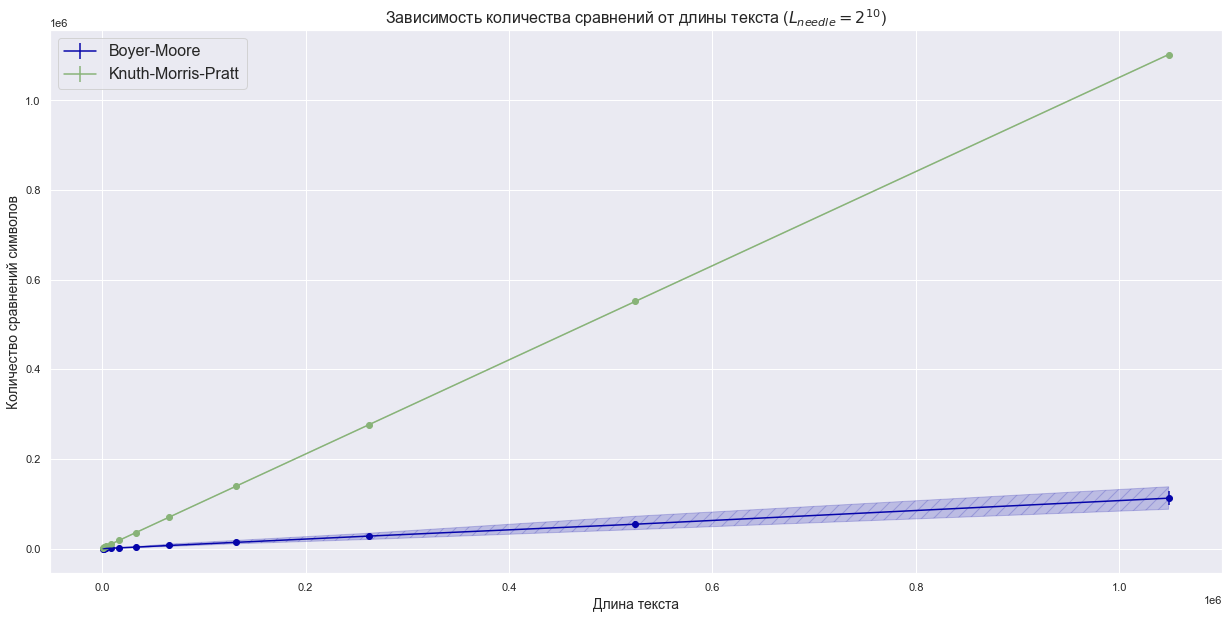

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(21, 10))
ax.errorbar(HAYSTACK_LENGTHS, mean_exp1[:, 0], yerr=std_exp1[:, 0], label='Boyer-Moore', color=sns.xkcd_rgb['royal blue'])
ax.scatter(HAYSTACK_LENGTHS, mean_exp1[:, 0], marker='o', color=sns.xkcd_rgb['royal blue'])
ax.fill_between(HAYSTACK_LENGTHS, max_exp1[:, 0], min_exp1[:, 0], hatch='//', color=sns.xkcd_rgb['royal blue'], alpha=0.2)

ax.errorbar(HAYSTACK_LENGTHS, mean_exp1[:, 1], yerr=std_exp1[:, 1], label='Knuth-Morris-Pratt', color=sns.xkcd_rgb['sage green'])
ax.scatter(HAYSTACK_LENGTHS, mean_exp1[:, 1], marker='o', color=sns.xkcd_rgb['sage green'])
ax.fill_between(HAYSTACK_LENGTHS, max_exp1[:, 1], min_exp1[:, 1], hatch='//', color=sns.xkcd_rgb['sage green'], alpha=0.2)
ax.legend(fontsize=16)
ax.set_title('Зависимость количества сравнений от длины текста ($L_{needle} = 2^{10}$)', fontsize=16)
ax.set_xlabel('Длина текста', fontsize=14)
ax.set_ylabel('Количество сравнений символов', fontsize=14);

In [23]:
norm_exp1_metrics = np.zeros_like(exp1_metrics).astype('float')
for idx, length in enumerate(HAYSTACK_LENGTHS):
    norm_exp1_metrics[idx, :] = exp1_metrics[idx, :] / length

In [25]:
norm_mean_exp1 = np.mean(norm_exp1_metrics, axis=1)
norm_std_exp1 = np.std(norm_exp1_metrics, axis=1)
norm_min_exp1 = np.min(norm_exp1_metrics, axis=1)
norm_max_exp1 = np.max(norm_exp1_metrics, axis=1)

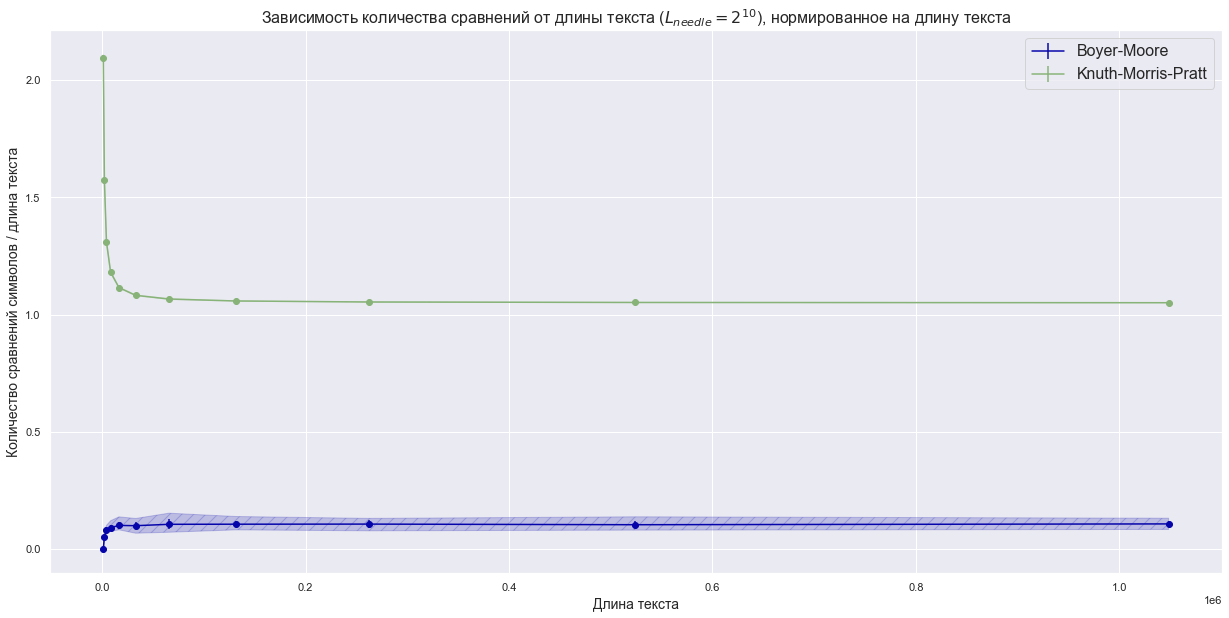

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(21, 10))
ax.errorbar(HAYSTACK_LENGTHS, norm_mean_exp1[:, 0], yerr=norm_std_exp1[:, 0], label='Boyer-Moore', color=sns.xkcd_rgb['royal blue'])
ax.scatter(HAYSTACK_LENGTHS, norm_mean_exp1[:, 0], marker='o', color=sns.xkcd_rgb['royal blue'])
ax.fill_between(HAYSTACK_LENGTHS, norm_max_exp1[:, 0], norm_min_exp1[:, 0], hatch='//', color=sns.xkcd_rgb['royal blue'], alpha=0.2)

ax.errorbar(HAYSTACK_LENGTHS, norm_mean_exp1[:, 1], yerr=norm_std_exp1[:, 1], label='Knuth-Morris-Pratt', color=sns.xkcd_rgb['sage green'])
ax.scatter(HAYSTACK_LENGTHS, norm_mean_exp1[:, 1], marker='o', color=sns.xkcd_rgb['sage green'])
ax.fill_between(HAYSTACK_LENGTHS, norm_max_exp1[:, 1], norm_min_exp1[:, 1], hatch='//', color=sns.xkcd_rgb['sage green'], alpha=0.2)
ax.legend(fontsize=16)
ax.set_title('Зависимость количества сравнений от длины текста ($L_{needle} = 2^{10}$), нормированное на длину текста', fontsize=16)
ax.set_xlabel('Длина текста', fontsize=14)
ax.set_ylabel('Количество сравнений символов / длина текста', fontsize=14);

## 2. Сравнение при разной длине образа (при фиксированной длине текста = 4096)

In [28]:
HAYSTACK_LENGTH = 2 ** 12
NEEDLE_LENGTHS = np.linspace(1, 2 ** 12, 20).astype('int')

exp2_metrics = []

for needle_length in tqdm(NEEDLE_LENGTHS, desc='Length'):
    current_metrics = []
    for _ in range(N_RESTARTS):
        needle = generate_protein_text(needle_length)
        haystack = generate_protein_text(HAYSTACK_LENGTH)

        pos_bm = boyer_moore(needle, haystack)
        bm_cmp_count = CmpCountStr.cmp_counter
        CmpCountStr.cmp_counter = 0

        pos_kmp = kmp(needle, haystack)
        kmp_cmp_count = CmpCountStr.cmp_counter
        CmpCountStr.cmp_counter = 0

        current_metrics.append([bm_cmp_count, kmp_cmp_count])
    exp2_metrics.append(current_metrics)


Length: 100%|██████████| 20/20 [00:09<00:00,  2.06it/s]


In [29]:
exp2_metrics = np.array(exp2_metrics)

mean_exp2 = np.mean(exp2_metrics, axis=1)
std_exp2 = np.std(exp2_metrics, axis=1)
min_exp2 = np.min(exp2_metrics, axis=1)
max_exp2 = np.max(exp2_metrics, axis=1)

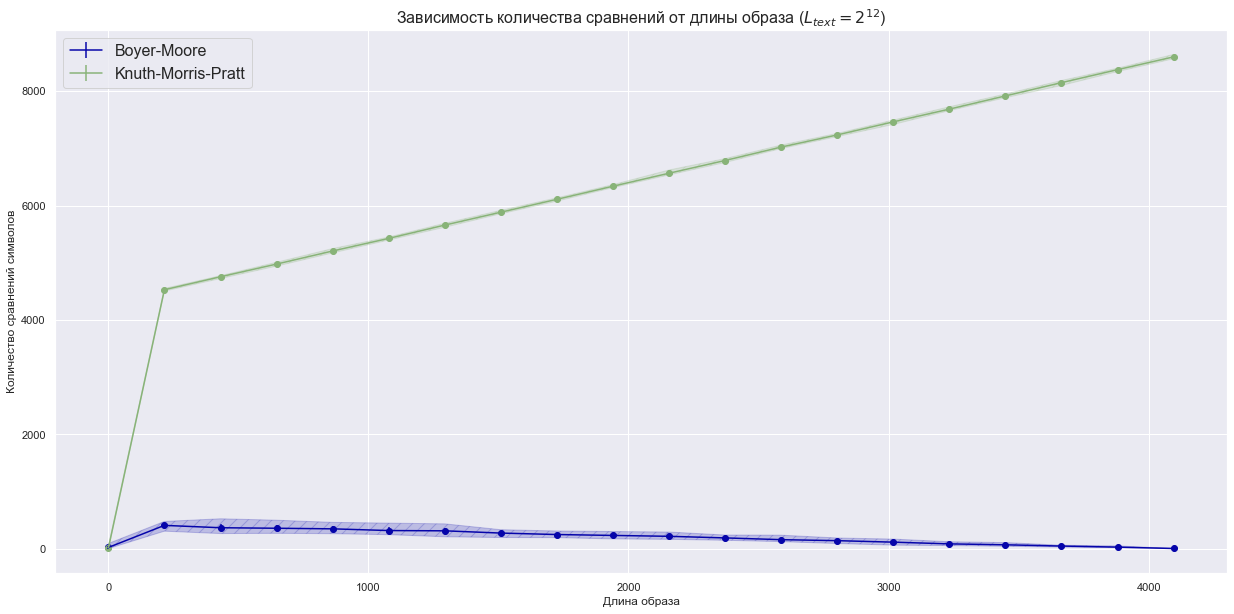

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(21, 10))
ax.errorbar(NEEDLE_LENGTHS, mean_exp2[:, 0], yerr=std_exp2[:, 0], label='Boyer-Moore', color=sns.xkcd_rgb['royal blue'])
ax.scatter(NEEDLE_LENGTHS, mean_exp2[:, 0], marker='o', color=sns.xkcd_rgb['royal blue'])
ax.fill_between(NEEDLE_LENGTHS, max_exp2[:, 0], min_exp2[:, 0], hatch='//', color=sns.xkcd_rgb['royal blue'], alpha=0.2)

ax.errorbar(NEEDLE_LENGTHS, mean_exp2[:, 1], yerr=std_exp2[:, 1], label='Knuth-Morris-Pratt', color=sns.xkcd_rgb['sage green'])
ax.scatter(NEEDLE_LENGTHS, mean_exp2[:, 1], marker='o', color=sns.xkcd_rgb['sage green'])
ax.fill_between(NEEDLE_LENGTHS, max_exp2[:, 1], min_exp2[:, 1], hatch='//', color=sns.xkcd_rgb['sage green'], alpha=0.2)
ax.legend(fontsize=16)
ax.set_title('Зависимость количества сравнений от длины образа ($L_{text} = 2^{12}$)', fontsize=16)
ax.set_xlabel('Длина образа')
ax.set_ylabel('Количество сравнений символов');

In [31]:
norm_exp2_metrics = np.zeros_like(exp2_metrics).astype('float')
for idx, length in enumerate(NEEDLE_LENGTHS):
    norm_exp2_metrics[idx, :] = exp2_metrics[idx, :] / length

In [32]:
norm_mean_exp2 = np.mean(norm_exp2_metrics, axis=1)
norm_std_exp2 = np.std(norm_exp2_metrics, axis=1)
norm_min_exp2 = np.min(norm_exp2_metrics, axis=1)
norm_max_exp2 = np.max(norm_exp2_metrics, axis=1)

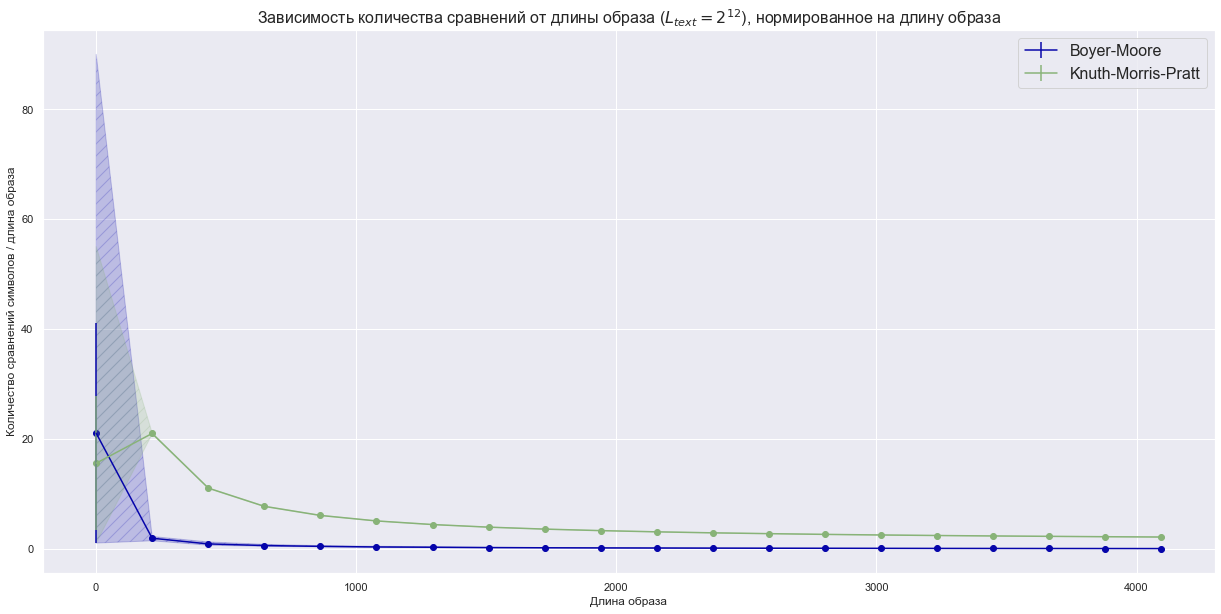

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(21, 10))
ax.errorbar(NEEDLE_LENGTHS, norm_mean_exp2[:, 0], yerr=norm_std_exp2[:, 0], label='Boyer-Moore', color=sns.xkcd_rgb['royal blue'])
ax.scatter(NEEDLE_LENGTHS, norm_mean_exp2[:, 0], marker='o', color=sns.xkcd_rgb['royal blue'])
ax.fill_between(NEEDLE_LENGTHS, norm_max_exp2[:, 0], norm_min_exp2[:, 0], hatch='//', color=sns.xkcd_rgb['royal blue'], alpha=0.2)

ax.errorbar(NEEDLE_LENGTHS, norm_mean_exp2[:, 1], yerr=norm_std_exp2[:, 1], label='Knuth-Morris-Pratt', color=sns.xkcd_rgb['sage green'])
ax.scatter(NEEDLE_LENGTHS, norm_mean_exp2[:, 1], marker='o', color=sns.xkcd_rgb['sage green'])
ax.fill_between(NEEDLE_LENGTHS, norm_max_exp2[:, 1], norm_min_exp2[:, 1], hatch='//', color=sns.xkcd_rgb['sage green'], alpha=0.2)
ax.legend(fontsize=16)
ax.set_title('Зависимость количества сравнений от длины образа ($L_{text} = 2^{12}$), нормированное на длину образа', fontsize=16)
ax.set_xlabel('Длина образа')
ax.set_ylabel('Количество сравнений символов / длина образа');